In [1]:
import glob 
import os
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline # To analyze one frame at each time
import trackpy as tp # To do the tracking
import numpy as np
import pandas as pd

# To convert to gray scale one by one each image of the video
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# Preliminar tracking

In  this script, I will develop an algorith to track the particles. 

In [2]:
directory ="/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/"

filenames = [file for file in glob.glob(
    os.path.join(directory,('EXP8_2023_03_23_16_25_36.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP8_2023_03_23_16_25_36.avi']

## One frame analysis

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP8_2023_03_23_16_25_36.avi


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f0f107d7830>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


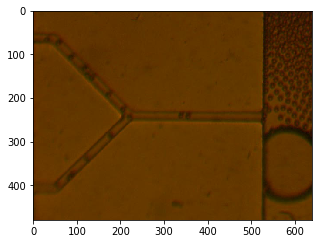

<Figure size 360x360 with 0 Axes>

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

exp = 0
frame = 1000


plt.figure(figsize = (5,5))
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [4]:
# inverted = tp.preprocessing.invert_image(video[frame])
# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(inverted)

In [5]:
# video_inverted = tp.preprocessing.invert_image(video)



# img_filtered = tp.preprocessing.bandpass(video[0], lshort = 0.85, llong = 51)
# img_filtered

In [6]:
video = as_gray(video)

In [7]:
def mean_frame(video):
    
    frames = video[0]
    for i in range(1, len(video), 1):

        frames = frames + video[i]
        
    mean = frames/len(video)
    
    return mean

In [8]:
# This function 

def substraction(frame, mean):
    
    frame_sub = (mean.astype(np.int8)- video[frame].astype(np.int8))
    
    return frame_sub

In [9]:
mean = mean_frame(video)

Frame([[49.016 , 49.9439, 52.5151, ..., 27.3328, 30.9136, 29.9136],
       [49.016 , 49.9439, 52.5151, ..., 25.3328, 28.9136, 27.9136],
       [49.016 , 49.9439, 52.5151, ..., 23.777 , 27.225 , 27.225 ],
       ...,
       [46.466 , 48.3218, 49.7468, ..., 59.0258, 59.0258, 59.0258],
       [46.466 , 48.3218, 49.7468, ..., 59.5287, 60.0316, 60.0316],
       [46.466 , 48.3218, 49.7468, ..., 58.5287, 60.0316, 61.0316]])
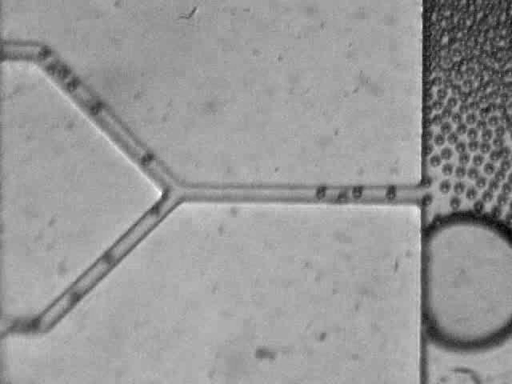

In [10]:
video[1970]

In [11]:
# sub.append(substraction(frame, 5191))

In [12]:
# img_filtered = tp.preprocessing.bandpass(inverted, lshort = 0.80, llong = 51, threshold=150/255, truncate=4)

# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(img_filtered)

Frame([[ 2,  1, -1, ..., -1, -2, -2],
       [ 3,  1, -1, ..., -1, -1, -2],
       [ 3,  1,  0, ...,  0,  0, -1],
       ...,
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  0,  1,  1],
       [ 0,  0,  0, ...,  0,  1,  0]], dtype=int8)
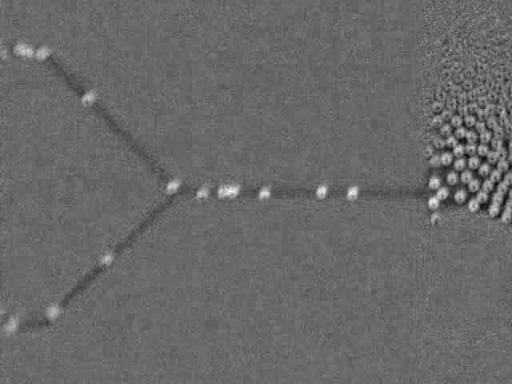

In [22]:
sub = substraction(2813, mean)
sub

In [25]:
diameter = 11
radius = diameter/2
radius

diameter = 2*radius

i = 0    

#@pipeline 
def locate(filename):

     return tp.locate(filename,2*round(radius)+1, threshold = 0,separation = diameter/2,minmass = 150)
#     return tp.locate(filename,2*round(radius)+1, threshold = 5, noise_size = 5, separation = diameter/2, percentile = 20,
#                     characterize = False)


loc = locate(sub)
loc

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
51,22.215854,602.860366,177.420985,3.607834,0.172551,5.084626,197.0,0.130566,0
59,26.768559,595.359950,173.418195,4.092200,0.272770,4.327341,204.0,0.127793,0
73,26.565090,621.632224,185.318383,3.632007,0.150752,6.491012,235.0,0.116804,0
126,52.285027,546.242781,202.303197,3.330382,0.184505,5.192809,220.0,0.121875,0
137,60.419786,573.733957,161.842557,3.469115,0.372547,4.543708,113.0,0.176548,0
...,...,...,...,...,...,...,...,...,...
686,323.226363,134.042558,470.273795,3.745252,0.099945,8.330132,1139.0,0.033301,0
824,388.482375,66.844360,398.980850,3.982098,0.015942,6.166461,1197.0,0.031841,0
852,401.496944,16.618483,300.858390,4.059916,0.124422,6.491012,890.0,0.041467,0
868,407.059474,15.719366,361.982084,3.927009,0.149373,6.491012,1099.0,0.034389,0


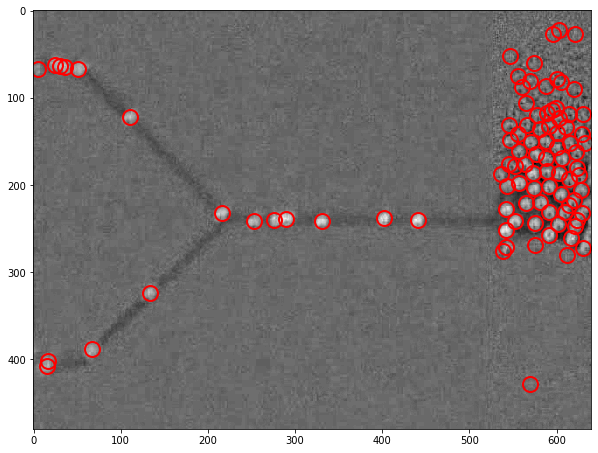

In [26]:
plt.figure(figsize=(10,10))
tp.annotate(loc, sub);

## Whole video

Until here the used method works fine. Outside the channel the tracking does not work perfectly, but inside the channel it works good. Then, I can use this parameters to do the tracking and after that filter only the ROI.

The problem with this method is that the function tp.preprocessing.bandpass() is not working for the whole video. 

<span style="color:red">I need to find the good parameters for descern two particles attached. </span>


In the following loop I apply all the filters and generate a dataframe with all the detected particles with the corresponding frame value. 

# Loop to analyze the whole video

In [27]:
%%time
diameter = 11
radius = diameter/2
radius

loc_df = []
for i in range(0,len(video), 2): # Analyze 1 frame each 30 frame

    sub = substraction(i, mean)

    loc = tp.locate(sub,2*round(radius)+1,  threshold = 0 ,separation = diameter/2,minmass =  150)
    
    loc['frame'] = i
    loc_df.append(loc.copy(deep = True))
    print(i)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

3504
3506
3508
3510
3512
3514
3516
3518
3520
3522
3524
3526
3528
3530
3532
3534
3536
3538
3540
3542
3544
3546
3548
3550
3552
3554
3556
3558
3560
3562
3564
3566
3568
3570
3572
3574
3576
3578
3580
3582
3584
3586
3588
3590
3592
3594
3596
3598
3600
3602
3604
3606
3608
3610
3612
3614
3616
3618
3620
3622
3624
3626
3628
3630
3632
3634
3636
3638
3640
3642
3644
3646
3648
3650
3652
3654
3656
3658
3660
3662
3664
3666
3668
3670
3672
3674
3676
3678
3680
3682
3684
3686
3688
3690
3692
3694
3696
3698
3700
3702
3704
3706
3708
3710
3712
3714
3716
3718
3720
3722
3724
3726
3728
3730
3732
3734
3736
3738
3740
3742
3744
3746
3748
3750
3752
3754
3756
3758
3760
3762
3764
3766
3768
3770
3772
3774
3776
3778
3780
3782
3784
3786
3788
3790
3792
3794
3796
3798
3800
3802
3804
3806
3808
3810
3812
3814
3816
3818
3820
3822
3824
3826
3828
3830
3832
3834
3836
3838
3840
3842
3844
3846
3848
3850
3852
3854
3856
3858
3860
3862
3864
3866
3868
3870
3872
3874
3876
3878
3880
3882
3884
3886
3888
3890
3892
3894
3896
3898
3900
3902


In [28]:
df = pd.concat(loc_df)

In [29]:
tracking = tp.link(df,10 , memory = 50, link_strategy ='recursive', neighbor_strategy= 'KDTree')

Frame 6326: 142 trajectories present.


In [30]:
tracking = tracking.set_index(["frame","particle"])

In [31]:
tracking 

y           x        mass      size       ecc  \
frame particle                                                           
0     0          25.575758  626.214815  185.608026  2.955107  0.213332   
      1         210.041194  571.372757  682.687567  3.649937  0.186921   
      2         207.932474  607.479677  571.947694  3.782204  0.282700   
      3         204.685333  556.466844  703.060704  4.190338  0.207469   
      4         207.368115  535.761065  624.067928  3.535605  0.192892   
...                    ...         ...         ...       ...       ...   
6326  13114     109.717435  582.093766  446.611221  3.787601  0.252792   
      16484     111.863095  632.038690  266.201113  3.378541  0.112739   
      13478     112.455249  560.590055  409.714298  3.657355  0.284386   
      21209     107.896825  540.811728  256.693930  3.147533  0.077957   
      24336     472.081101  494.284970  152.114922  3.966001  0.190842   

                   signal  raw_mass        ep  
frame particle                                 
0     0          6.624394     164.0  0.103526  
      1         11.873914     941.0  0.028578  
      2         10.624028     633.0  0.040080  
      3         14.623663    1049.0  0.025965  
      4         13.123800     903.0  0.029627  
...                   ...       ...       ...  
6326  13114      9.054460     569.0  0.082337  
      16484      7.583110     241.0  0.133046  
      13478     12.336701     541.0  0.085106  
      21209      7.583110     286.0  0.122680  
      24336      1.924073     163.0  0.155875  

[380578 rows x 8 columns]

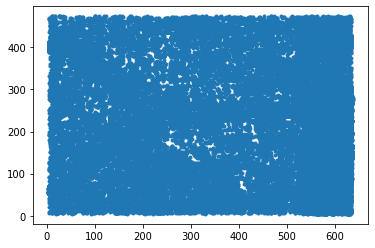

In [32]:
plt.plot(tracking.x, tracking.y,'.')

In [33]:
track = tracking

### filtering tracked data
Now I am filtering only the particles that pass through the channel 

In [34]:
track["l_travelled"] = track.groupby("particle")["x"].transform(lambda x: x - x.max())

In [35]:
track.groupby('particle')['l_travelled'].min().to_frame()

,l_travelled
particle,
0,-10.764625
1,-245.409213
2,-433.055591
3,-20.504240
4,-522.747103
...,...
24332,0.000000
24333,0.000000
24334,0.000000


In [36]:
particles_in_channel = (track.groupby('particle')['l_travelled'].min() > -100).to_frame()

In [37]:
particles_in_channel = particles_in_channel.loc[particles_in_channel.l_travelled, :]

# I need to filter out the false row not the true!!!!

In [38]:
particles_in_channel

,l_travelled
particle,
0,True
3,True
5,True
6,True
8,True
...,...
24332,True
24333,True
24334,True


In [39]:
passed = particles_in_channel.index.unique()

In [40]:
passed

Int64Index([    0,     3,     5,     6,     8,     9,    10,    11,    12,
               13,
            ...
            24327, 24328, 24329, 24330, 24331, 24332, 24333, 24334, 24335,
            24336],
           dtype='int64', name='particle', length=24300)

In [41]:
track = track.drop(index=passed, level = 1)


In [42]:
track

y           x        mass      size       ecc  \
frame particle                                                           
0     1         210.041194  571.372757  682.687567  3.649937  0.186921   
      2         207.932474  607.479677  571.947694  3.782204  0.282700   
      4         207.368115  535.761065  624.067928  3.535605  0.192892   
      7         199.636493  593.466613  615.818682  4.021986  0.170135   
      29        228.263987  537.183053  690.311870  3.796636  0.058098   
...                    ...         ...         ...       ...       ...   
6326  12979     230.548004  214.424974  552.887941  4.102674  0.187211   
      19412     242.053208  337.622551  589.218960  3.803319  0.293203   
      7045      243.020408  384.954740  687.686209  3.755115  0.171683   
      8959      237.832436  309.727456  672.746350  3.916611  0.155677   
      4          60.453194   16.285250  487.243109  3.844963  0.058059   

                   signal  raw_mass        ep  l_travelled  
frame particle                                              
0     1         11.873914     941.0  0.028578    -0.665833  
      2         10.624028     633.0  0.040080    -0.994034  
      4         13.123800     903.0  0.029627    -2.496385  
      7         11.623937     814.0  0.032414    -0.049451  
      29        11.873914    1301.0  0.021400    -0.306696  
...                   ...       ...       ...          ...  
6326  12979      9.394002    1445.0  0.040803  -338.034803  
      19412     11.431255    1487.0  0.039839  -198.865629  
      7045      11.318075    1629.0  0.036894  -164.193800  
      8959      10.299448    1791.0  0.034024  -284.863000  
      4          8.149014    1256.0  0.045786  -521.972201  

[44377 rows x 9 columns]

In [43]:
track.index.get_level_values('particle').unique()

Int64Index([    1,     2,     4,     7,    29,    41,    43,    46,    47,
               48,    50,    51,    52,    55,   157,   343,   389,   514,
              818,  1197,  2904,  3094,  4213,  7045,  8959,  8966,  9859,
            10199, 10757, 10759, 12740, 12879, 12979, 14398, 17089, 19199,
            19412],
           dtype='int64', name='particle')

In [120]:
track.query('particle == 5')

,,y,x,mass,size,ecc,signal,raw_mass,ep,l_travelled
frame,particle,,,,,,,,,


In [121]:
track.query('particle == 2')

,,y,x,mass,size,ecc,signal,raw_mass,ep,l_travelled
frame,particle,,,,,,,,,


In [ ]:
fig, ax = plt.subplots(1,figsize=(15,30))
i = 2
for p,trj_p in tracking.groupby("particle"):
    ax.plot(trj_p.x, trj_p.y*i, "o")
    ax.text(trj_p.x.min(), trj_p.y.max()*i,s = str(p), size = 30)
    i =i + 50 
plt.tight_layout()